In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
import scipy
from tqdm import tqdm 


In [ ]:
# Code used for styling of the plots
plt.style.use("Solarize_Light2")
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 8.0 MB/s 
     |████████████████████████████████| 596 kB 70.4 MB/s 
     |████████████████████████████████| 6.6 MB 67.7 MB/s 
     |████████████████████████████████| 86 kB 5.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")

model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")

Downloading:   0%|          | 0.00/929 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# If you run the notebook on kaggle this can be commented out
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Code to unzip and fetch files into the session
! unzip "drive/MyDrive/AML/eurecom-aml-2022-challenge-3.zip" -d "/content/data"

Archive:  drive/MyDrive/AML/eurecom-aml-2022-challenge-3.zip
  inflating: /content/data/sample_submission.csv  
  inflating: /content/data/test.csv  
  inflating: /content/data/train.csv  


In [ ]:
#df = pd.read_csv("/kaggle/input/santander-customer-transaction-prediction/train.csv") #Code for downloading the train set when on kaggle
df = pd.read_csv('./data/train.csv', low_memory=True)
df['text']=df['text'].apply(lambda x: x.lower())
df_test = pd.read_csv('./data/test.csv', low_memory=True)
df_test['text']=df_test['text'].apply(lambda x: x.lower())

# Data analysis

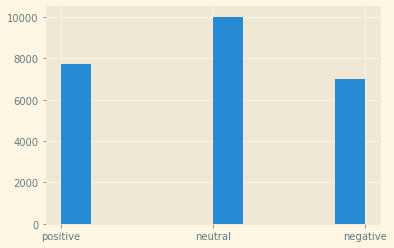

In [ ]:
df.sentiment.hist()

In [ ]:
df.isnull().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

In [ ]:
df.describe()

,textID,text,selected_text,sentiment
count,24732,24732,24732,24732
unique,24732,24696,20298,3
top,28ac06f416,thank you,love,neutral
freq,1,3,174,10018


In [ ]:
df_test.isnull().sum()

textID           0
text             0
selected_text    0
dtype: int64

In [ ]:
# num = df[df["sentiment"]=="negative"].shape[0]
# positive = df[df["sentiment"]=="positive"].sample(num)
# negative = df[df["sentiment"]=="negative"].sample(num)
# neutral = df[df["sentiment"]=="neutral"].sample(num)
# df = pd.concat([positive, negative, neutral])
# df

# Data Preprocessing

In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 346 kB 8.0 MB/s 
     |████████████████████████████████| 140 kB 86.0 MB/s 
     |████████████████████████████████| 1.1 MB 64.5 MB/s 
     |████████████████████████████████| 212 kB 86.3 MB/s 
     |████████████████████████████████| 86 kB 6.6 MB/s 
     |████████████████████████████████| 127 kB 77.2 MB/s 
     |████████████████████████████████| 271 kB 79.2 MB/s 
     |████████████████████████████████| 94 kB 3.8 MB/s 
     |████████████████████████████████| 144 kB 77.0 MB/s 
     |████████████████████████████████| 112 kB 90.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: dill
    Found existing installation: dill 0.3.5.1
    Uninstalling dill-0.3.5.1:
      Successfully uninstalled dill-0.3.5.1
  Attempting unin

In [ ]:
from datasets import Dataset
df_selected = df[["text", "sentiment"]]
target_conversion = {
    'neutral': 1,
    'positive': 2,
    'negative': 0,
}
df_selected['label'] = df_selected['sentiment'].map(target_conversion)
df_selected = df_selected.drop("sentiment", axis=1)
print(df_selected)
dataset = Dataset.from_pandas(df_selected)

                                                    text  label
0                            good luck with your auction      2
1      hmm..you can`t judge a book by looking at its ...      1
2       hello, yourself. enjoy london. watch out for ...      0
3             we can`t even call you from belgium  sucks      0
4                                     not so good mood..      0
...                                                  ...    ...
24727  getting closer to logging in. my left hand is ...      0
24728                             i`m drawning in emails      1
24729        oh duh....i see that now .....thank you....      2
24730   my internet in like 9th grade was so fast, it...      0
24731   content content content .... gah! story of my...      2

[24732 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dataset = dataset.train_test_split(0.1)

In [ ]:
#text = df.text.to_list()

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
def preprocess_function(example):
    return tokenizer(example["text"], truncation=True)

In [ ]:
#df["trunc"] = df["text"].apply(lambda x: preprocess_function(x))

In [ ]:
tokenized_dataset = dataset.map(preprocess_function, batched=True)

Parameter 'function'=<function preprocess_function at 0x7f13b162a5f0> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


  0%|          | 0/23 [00:00<?, ?ba/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


  0%|          | 0/3 [00:00<?, ?ba/s]

# Implementing Transformer

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer


In [ ]:
training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=1e-3,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=2,
    weight_decay=0.02,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset= tokenized_dataset["train"],
    eval_dataset= tokenized_dataset["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
)

trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 22258
  Num Epochs = 2
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 1392
The following columns in the training set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.


Step,Training Loss
500,1.106300
1000,1.093400


Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin
tokenizer config file saved in ./results/checkpoint-500/tokenizer_config.json
Special tokens file saved in ./results/checkpoint-500/special_tokens_map.json
Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./results/checkpoint-1000/pytorch_model.bin
tokenizer config file saved in ./results/checkpoint-1000/tokenizer_config.json
Special tokens file saved in ./results/checkpoint-1000/special_tokens_map.json


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=1392, training_loss=1.0964340122266747, metrics={'train_runtime': 226.159, 'train_samples_per_second': 196.835, 'train_steps_per_second': 6.155, 'total_flos': 936694044979560.0, 'train_loss': 1.0964340122266747, 'epoch': 2.0})

In [ ]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
from transformers import TextClassificationPipeline
pipe = TextClassificationPipeline(model=model, tokenizer=tokenizer, device=0, framework="pt", return_all_scores=False)
device = torch.device('cuda')

In [ ]:
#df_test = pd.read_csv('./data/test.csv', low_memory=True)
test = df_test.text.to_list()

In [ ]:
test

[' happy mother`s day hahaha',
 'sorry for the triple twitter post, was having trouble w/stocktwits account.  i try not to clutter up the twittersphere!',
 ' thats much better than the flu syndrome!',
 'aww i have a tummy ache',
 ' hey chocolate chips is good.  i want a snack too but i`m out of snacks.',
 "_honi might be cute to do a little picture book called 'the little book of boring'",
 ' - i produce/direct/film/edit... i write... i coordinate events... i manage don fetti... there ain`t much i don`t do!',
 'i love fly with me, live chats and don`t like being sick.',
 '  caww that sounds good, i hope you`re right',
 'i think i need some new friends',
 ' funny you should say...am filling it out as we speak ;) cheers!',
 ' ohh noo. joshua im sooo sorry i was out ,im really sorry i didnt get to see you :``( please forgive me  i`m sorry <3',
 ' yes, it will finish at 7:30 tonight. still the food has been great as has been the discussion',
 'can`t wait to november for jobros concert ! in

In [ ]:
results = pipe(test)

Disabling tokenizer parallelism, we're using DataLoader multithreading already


In [ ]:
results

[{'label': 'Neutral', 'score': 0.4243243932723999},
 {'label': 'Neutral', 'score': 0.41307777166366577},
 {'label': 'Neutral', 'score': 0.40406334400177},
 {'label': 'Neutral', 'score': 0.4093237519264221},
 {'label': 'Neutral', 'score': 0.41063427925109863},
 {'label': 'Neutral', 'score': 0.4122346043586731},
 {'label': 'Neutral', 'score': 0.4133032560348511},
 {'label': 'Neutral', 'score': 0.40676894783973694},
 {'label': 'Neutral', 'score': 0.3955444097518921},
 {'label': 'Neutral', 'score': 0.42026177048683167},
 {'label': 'Neutral', 'score': 0.409606397151947},
 {'label': 'Neutral', 'score': 0.39423224329948425},
 {'label': 'Neutral', 'score': 0.40150636434555054},
 {'label': 'Neutral', 'score': 0.3948003947734833},
 {'label': 'Neutral', 'score': 0.4187661409378052},
 {'label': 'Neutral', 'score': 0.41247138381004333},
 {'label': 'Neutral', 'score': 0.4341987669467926},
 {'label': 'Neutral', 'score': 0.4327540695667267},
 {'label': 'Neutral', 'score': 0.3814391493797302},
 {'label

In [ ]:
#[x for x in results if [y for y in  ]]

In [ ]:
result = pd.DataFrame(results)

In [ ]:
result

,label,score
0,Neutral,0.424324
1,Neutral,0.413078
2,Neutral,0.404063
3,Neutral,0.409324
4,Neutral,0.410634
...,...,...
2743,Neutral,0.422071
2744,Neutral,0.400283
2745,Neutral,0.413901
2746,Neutral,0.407923


In [ ]:
target_conversion = {
    'Neutral': 0,
    'Positive': 1,
    'Negative': -1,
}
result['label'] = result['label'].map(target_conversion)

In [ ]:
result["textID"] = df_test["textID"]

In [ ]:
result = result.drop("score", axis=1)
result = result.rename(columns={"label": "sentiment"})

In [ ]:
result.to_csv("submission_roberta_2epochsFinetuned1e-2lr.csv", index=False)